# Fitness Center Data Analysis Project

## Overview
This project analyzes fitness center member data to understand member behavior, patterns, and engagement metrics.

### Project Goals:
- Analyze member demographics and attendance patterns
- Study check-in/check-out timing behavior
- Evaluate membership duration and retention
- Identify correlations between different metrics

## Table of Contents:
1. Data Import & Setup
2. Initial Data Exploration
3. Data Cleaning & Preprocessing
4. Feature Engineering
5. Exploratory Data Analysis
6. Data Export

In [1]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import pyodbc as sql

In [2]:
# 2. Database Connection
# Establish connection to SQL Server and load member data
conn = sql.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Fitness_analysis;"
    "Trusted_Connection=yes;"
)

df = pd.read_sql("SELECT * FROM Fitness_Members;", conn)

C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2132508427.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Fitness_Members;", conn)


In [3]:
# Query all records from Fitness_Members table
df.sample(10)

,age,membership_type,visit_per_week,days_per_week,attend_group_lesson,avg_time_check_in,avg_time_check_out,duration_in_gym_minutes,has_drink_subscription,personal_training,...,final_price,access_hours,home_gym_location,latitude,longitude,join_date,personal_training_hours,multi_location_access,last_visit_date,TIME_IN
1831,38,Premium,5,"Fri, Sat, Sun, Thu, Tue",False,17:59:00,20:54:00,175,True,False,...,50.000,All hours,"Sacramento, CA",38.581600,-121.494400,2023-10-11,0,True,2025-06-18,17
1251,15,Basic,2,"Fri, Sun",True,14:20:00,17:01:00,161,False,False,...,20.000,Off-peak only,"Anaheim, CA",33.836601,-117.914299,2025-02-18,0,True,2025-07-15,14
955,30,Standard,1,Sun,True,08:38:00,10:08:00,90,False,True,...,30.000,Weekdays only,"San Francisco, CA",37.774899,-122.419403,2023-12-18,1,False,2025-06-21,8
1970,20,Premium,3,"Fri, Thu, Tue",False,15:37:00,18:07:00,150,False,True,...,45.000,All hours,"Sacramento, CA",38.581600,-121.494400,2024-09-05,1,True,2025-07-06,15
229,26,Basic,3,"Sat, Sun, Wed",True,10:22:00,11:36:00,74,False,True,...,15.000,Off-peak only,"Bakersfield, CA",35.373299,-119.018700,2023-08-20,8,False,2025-06-15,10
277,42,Standard,5,"Fri, Mon, Sat, Thu, Tue",False,17:30:00,20:15:00,165,True,False,...,28.500,Weekdays only,"Fresno, CA",36.737801,-119.787102,2023-07-31,0,False,2025-06-14,17
1195,49,Premium,1,Tue,True,20:23:00,21:08:00,45,True,False,...,42.500,All hours,"San Jose, CA",37.338200,-121.886299,2022-08-21,0,True,2025-05-25,20
297,48,Premium,2,"Tue, Wed",False,09:57:00,12:35:00,158,False,True,...,31.875,All hours,"San Francisco, CA",37.774899,-122.419403,2024-11-05,4,True,2025-07-10,9
329,36,Elite,2,"Fri, Tue",True,18:19:00,20:02:00,103,False,True,...,49.875,All hours + Priority access,"Long Beach, CA",33.770100,-118.193703,2024-10-02,3,True,2025-07-08,18
149,40,Standard,1,Fri,False,18:30:00,19:44:00,74,True,False,...,25.650,Weekdays only,"San Jose, CA",37.338200,-121.886299,2024-08-30,0,True,2025-07-06,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1998 non-null   int64  
 1   membership_type          1998 non-null   object 
 2   visit_per_week           1998 non-null   int64  
 3   days_per_week            1998 non-null   object 
 4   attend_group_lesson      1998 non-null   bool   
 5   avg_time_check_in        1998 non-null   object 
 6   avg_time_check_out       1998 non-null   object 
 7   duration_in_gym_minutes  1998 non-null   int64  
 8   has_drink_subscription   1998 non-null   bool   
 9   personal_training        1998 non-null   bool   
 10  uses_sauna               1998 non-null   bool   
 11  self_identified_gender   1998 non-null   object 
 12  subscription_price       1998 non-null   int64  
 13  subscription_model       1998 non-null   object 
 14  adjusted_price          

In [5]:
df.isnull().sum()

age                        0
membership_type            0
visit_per_week             0
days_per_week              0
attend_group_lesson        0
avg_time_check_in          0
avg_time_check_out         0
duration_in_gym_minutes    0
has_drink_subscription     0
personal_training          0
uses_sauna                 0
self_identified_gender     0
subscription_price         0
subscription_model         0
adjusted_price             0
discount_type              0
discount_rate              0
final_price                0
access_hours               0
home_gym_location          0
latitude                   0
longitude                  0
join_date                  0
personal_training_hours    0
multi_location_access      0
last_visit_date            0
TIME_IN                    0
dtype: int64

In [6]:
df.shape

(1998, 27)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,age,visit_per_week,duration_in_gym_minutes,subscription_price,adjusted_price,final_price,latitude,longitude,personal_training_hours,TIME_IN
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,30.591091,2.676176,104.818819,40.140140,36.596847,34.471384,35.818504,-119.801069,2.305806,14.003003
std,10.740041,1.234110,43.363542,15.457645,14.860914,14.266186,1.994180,1.864262,2.758167,3.734556
min,12.000000,1.000000,30.000000,20.000000,15.000000,12.750000,32.715698,-122.419403,0.000000,8.000000
25%,21.000000,2.000000,67.000000,30.000000,22.500000,22.500000,33.836601,-121.886299,0.000000,11.000000
50%,30.000000,3.000000,103.000000,50.000000,37.500000,31.875000,36.737801,-119.787102,1.000000,14.000000
75%,40.000000,3.000000,142.000000,50.000000,50.000000,45.000000,37.774899,-118.193703,5.000000,17.000000
max,49.000000,5.000000,180.000000,70.000000,70.000000,70.000000,38.581600,-117.161102,8.000000,20.000000


In [9]:
df.describe(include='object')

,membership_type,days_per_week,avg_time_check_in,avg_time_check_out,self_identified_gender,subscription_model,discount_type,discount_rate,access_hours,home_gym_location,join_date,last_visit_date
count,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998
unique,4,112,520,533,5,3,4,4,4,10,890,60
top,Premium,Fri,11:56:00,14:08:00,Male,Monthly,None,00:00:00,All hours,"Fresno, CA",2022-08-25,2025-05-31
freq,812,69,15,16,757,1187,840,840,812,265,10,44


In [10]:
Date_columns = ["join_date", "last_visit_date"]
Time_columns = ["avg_time_check_out", "avg_time_check_in"]
for col in Date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")
for col in Time_columns:
    df[col] = pd.to_datetime(df[col], format="%H:%M:%S", errors="coerce").dt.hour

df["discount_rate"] = (pd.to_datetime(
    df["discount_rate"], format="%H:%M:%S", errors="coerce"
).dt.minute)/100

In [11]:
df["stay_in"] = (df["last_visit_date"] - df["join_date"]).dt.days

In [12]:
# نظف البيانات
df["days_per_week"] = (
    df["days_per_week"]
    .str.strip()  # يشيل المسافات
    .str.replace(" ", "")  # لو في مسافات وسط الكلام
    .str.title()  # يخلي أول حرف كابيتال
)

# بعدين اعمل الدميات
days_df = df["days_per_week"].str.get_dummies(sep=",")

# تأكد من ترتيب الأيام
days_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
for day in days_order:
    if day not in days_df.columns:
        days_df[day] = 0

days_df = days_df[days_order]

# أدمج مع الداتا الأصلية
df = pd.concat([df.drop(columns=["days_per_week", "TIME_IN"]), days_df], axis=1)

In [13]:
objects = df.select_dtypes(include=["object","bool"]).columns
numerics = df.select_dtypes(exclude=["object"]).columns

********************  Value Count of membership_type  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


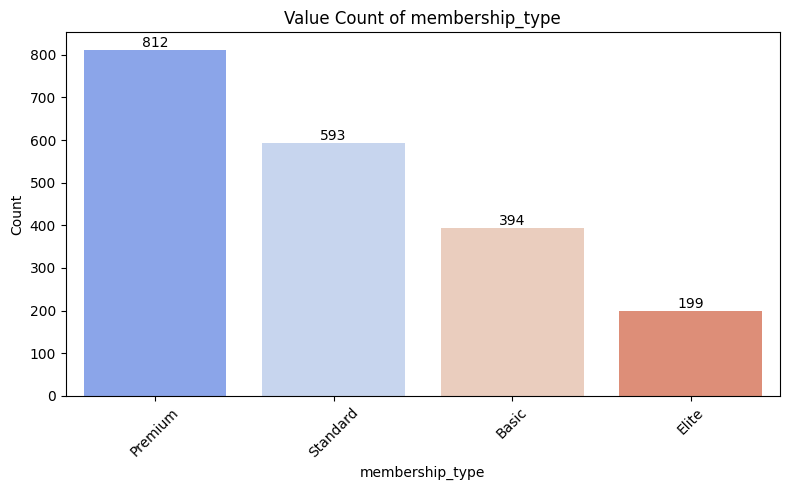

__________________________________________________________________________________________________
********************  Value Count of attend_group_lesson  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


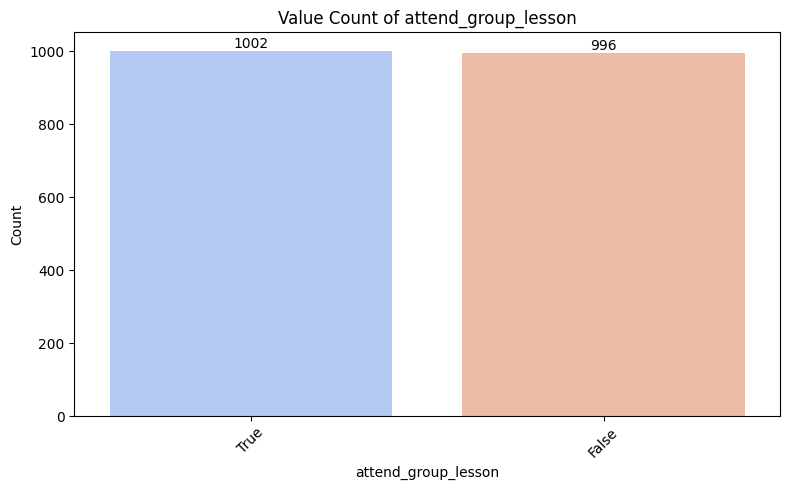

__________________________________________________________________________________________________
********************  Value Count of has_drink_subscription  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


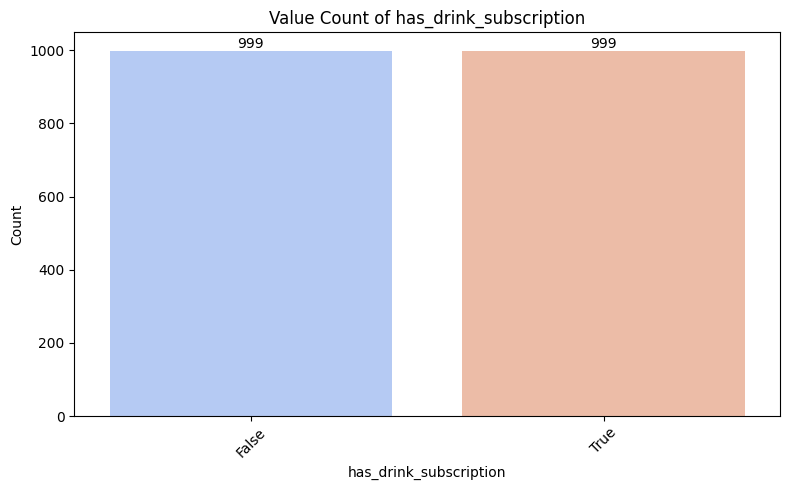

__________________________________________________________________________________________________
********************  Value Count of personal_training  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


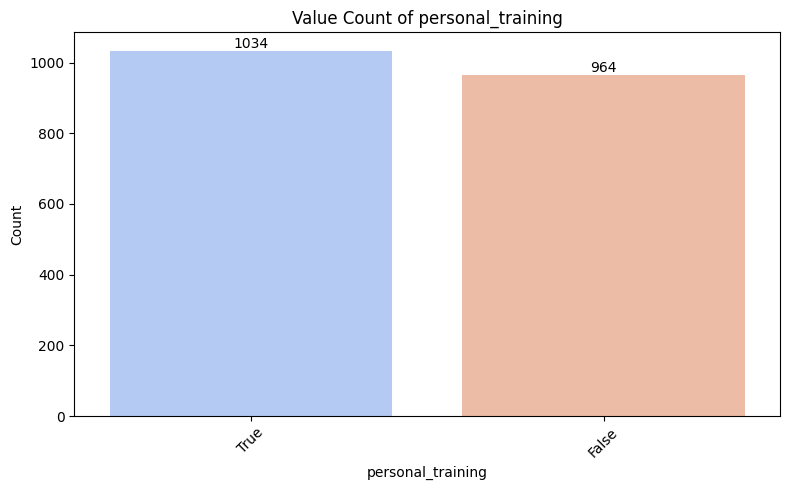

__________________________________________________________________________________________________
********************  Value Count of uses_sauna  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


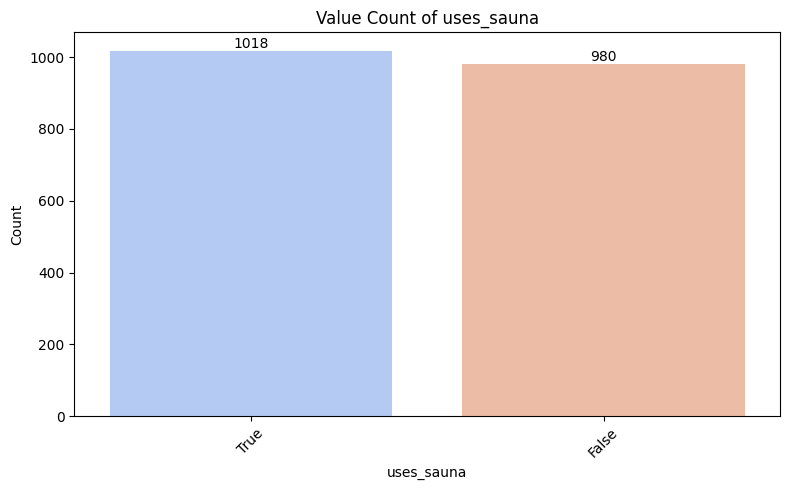

__________________________________________________________________________________________________
********************  Value Count of self_identified_gender  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


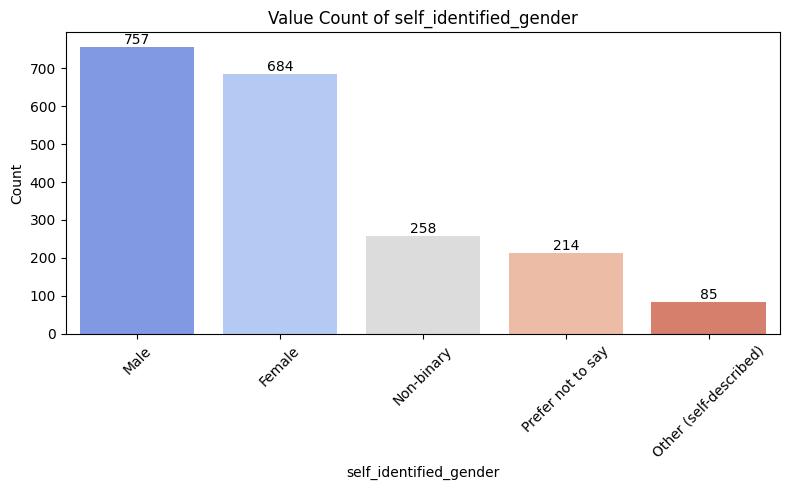

__________________________________________________________________________________________________
********************  Value Count of subscription_model  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


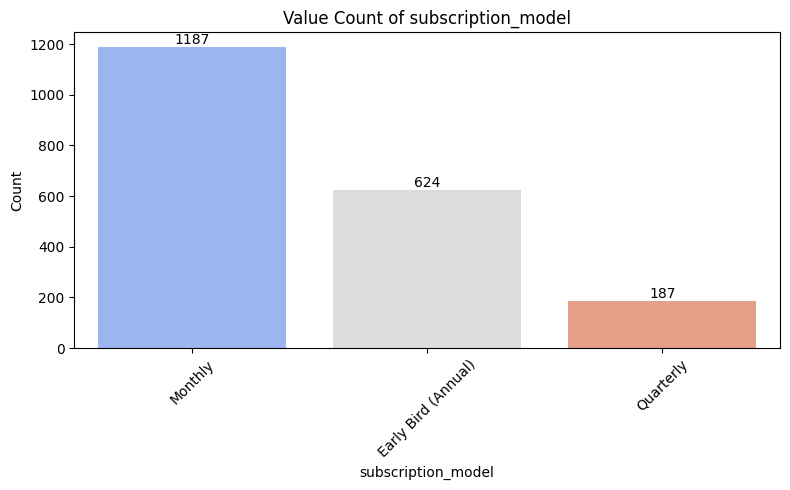

__________________________________________________________________________________________________
********************  Value Count of discount_type  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


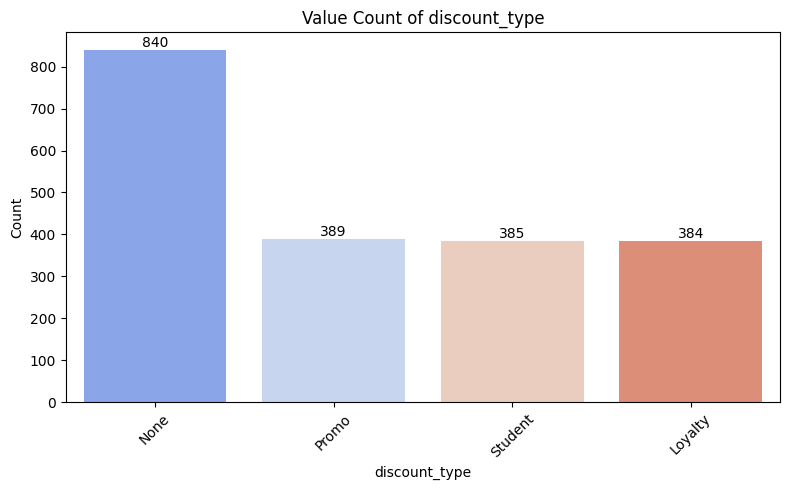

__________________________________________________________________________________________________
********************  Value Count of access_hours  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


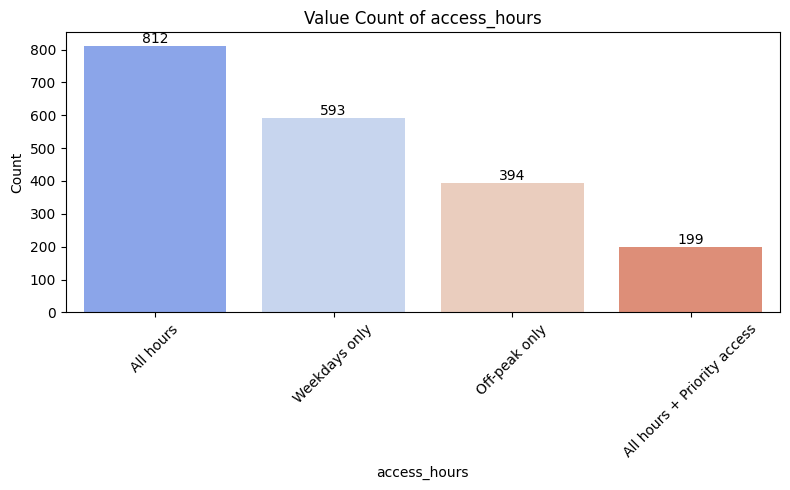

__________________________________________________________________________________________________
********************  Value Count of home_gym_location  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


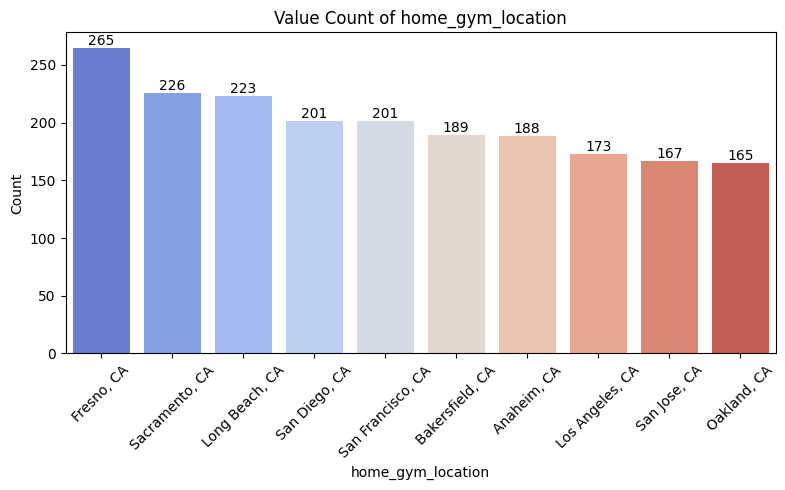

__________________________________________________________________________________________________
********************  Value Count of multi_location_access  ********************


C:\Users\computer\AppData\Local\Temp\ipykernel_10900\2603018264.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")


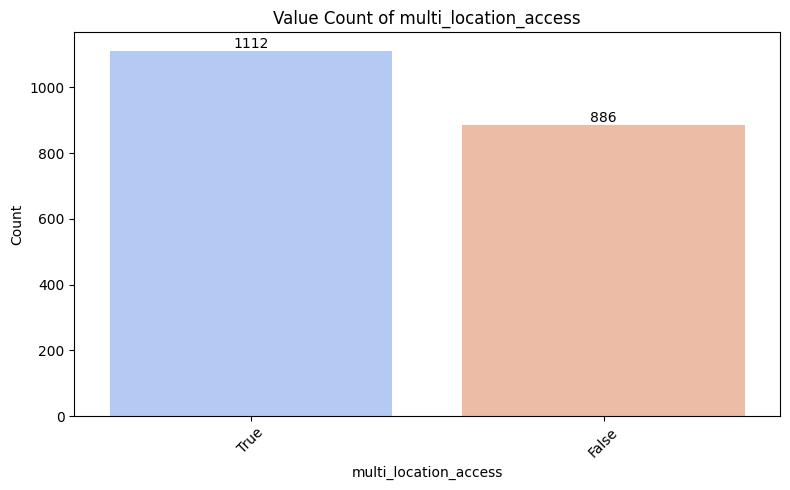

__________________________________________________________________________________________________


In [14]:
for col in objects:
    print(f"********************  Value Count of {col}  ********************")

    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette="coolwarm")

    # إضافة القيم فوق الأعمدة
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", label_type="edge")

    plt.title(f"Value Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(
        "__________________________________________________________________________________________________"
    )

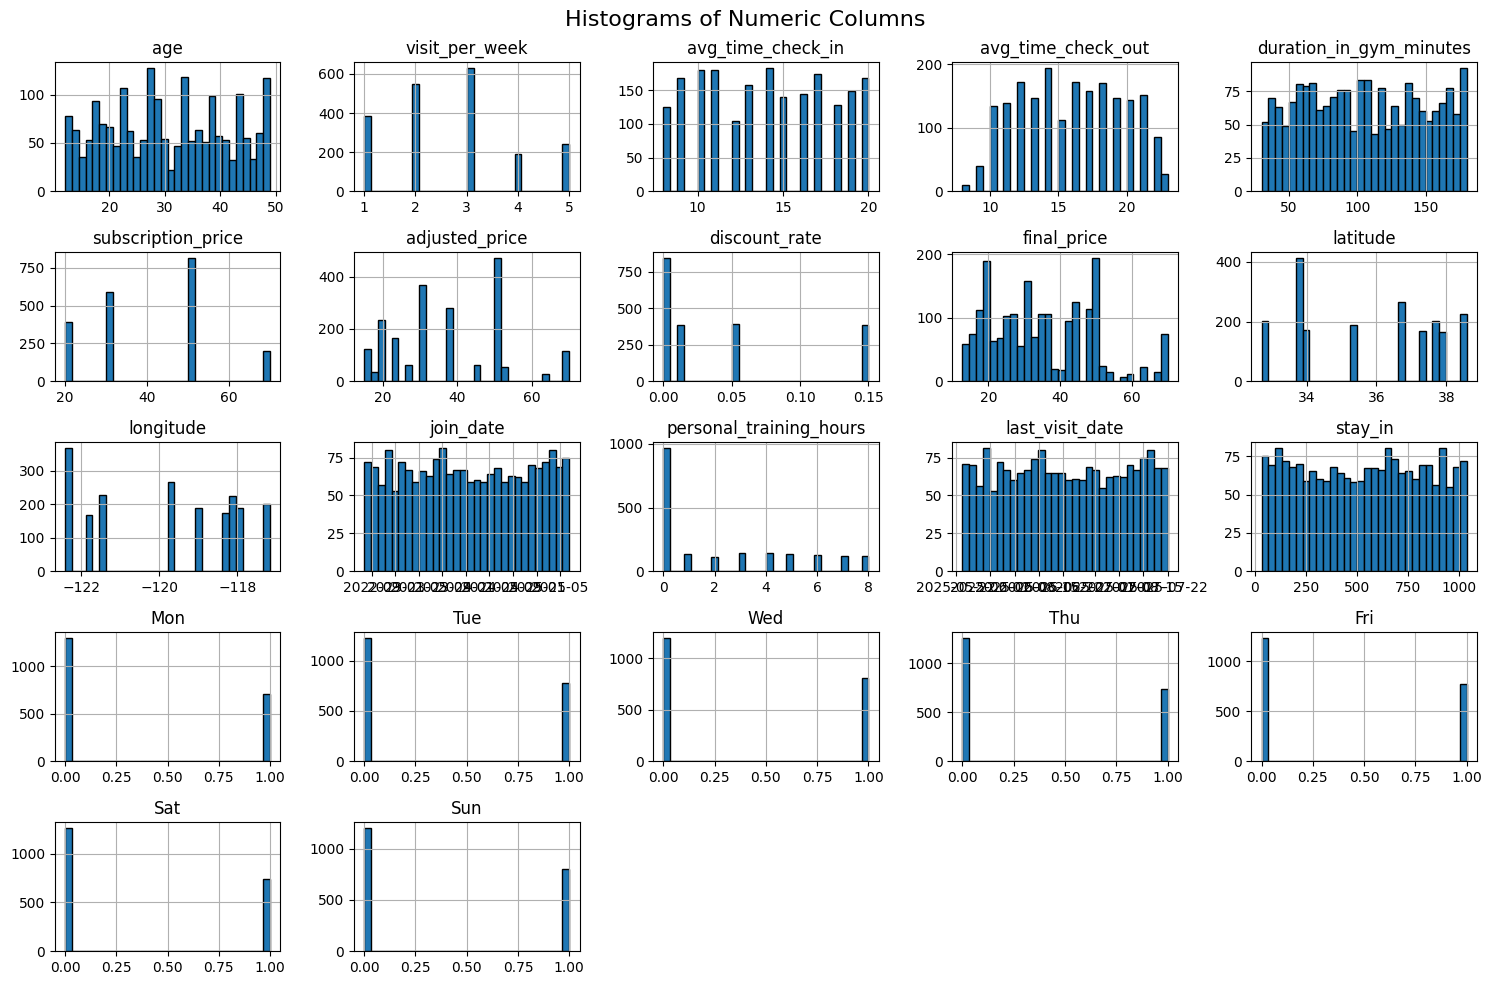

In [15]:
df[numerics].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Days per Week')

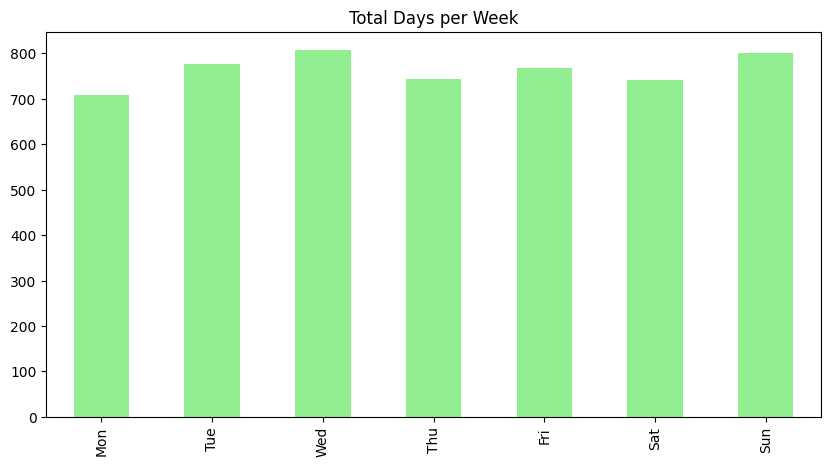

In [16]:
days_df.sum().plot(kind='bar', figsize=(10, 5), color='lightgreen')
plt.title('Total Days per Week')

In [17]:
df.head()

,age,membership_type,visit_per_week,attend_group_lesson,avg_time_check_in,avg_time_check_out,duration_in_gym_minutes,has_drink_subscription,personal_training,uses_sauna,...,multi_location_access,last_visit_date,stay_in,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,40,Premium,2,False,8,10,118,False,False,False,...,True,2025-06-30,406,0,0,0,1,0,1,0
1,35,Standard,5,True,15,18,178,False,False,False,...,False,2025-05-26,985,0,1,1,1,1,1,0
2,39,Standard,4,True,13,14,62,True,True,True,...,False,2025-06-09,766,0,1,1,1,0,0,1
3,35,Basic,2,False,17,18,93,True,True,False,...,False,2025-06-17,632,1,1,0,0,0,0,0
4,18,Standard,2,False,14,16,161,True,True,False,...,True,2025-07-13,187,0,0,1,0,0,0,1


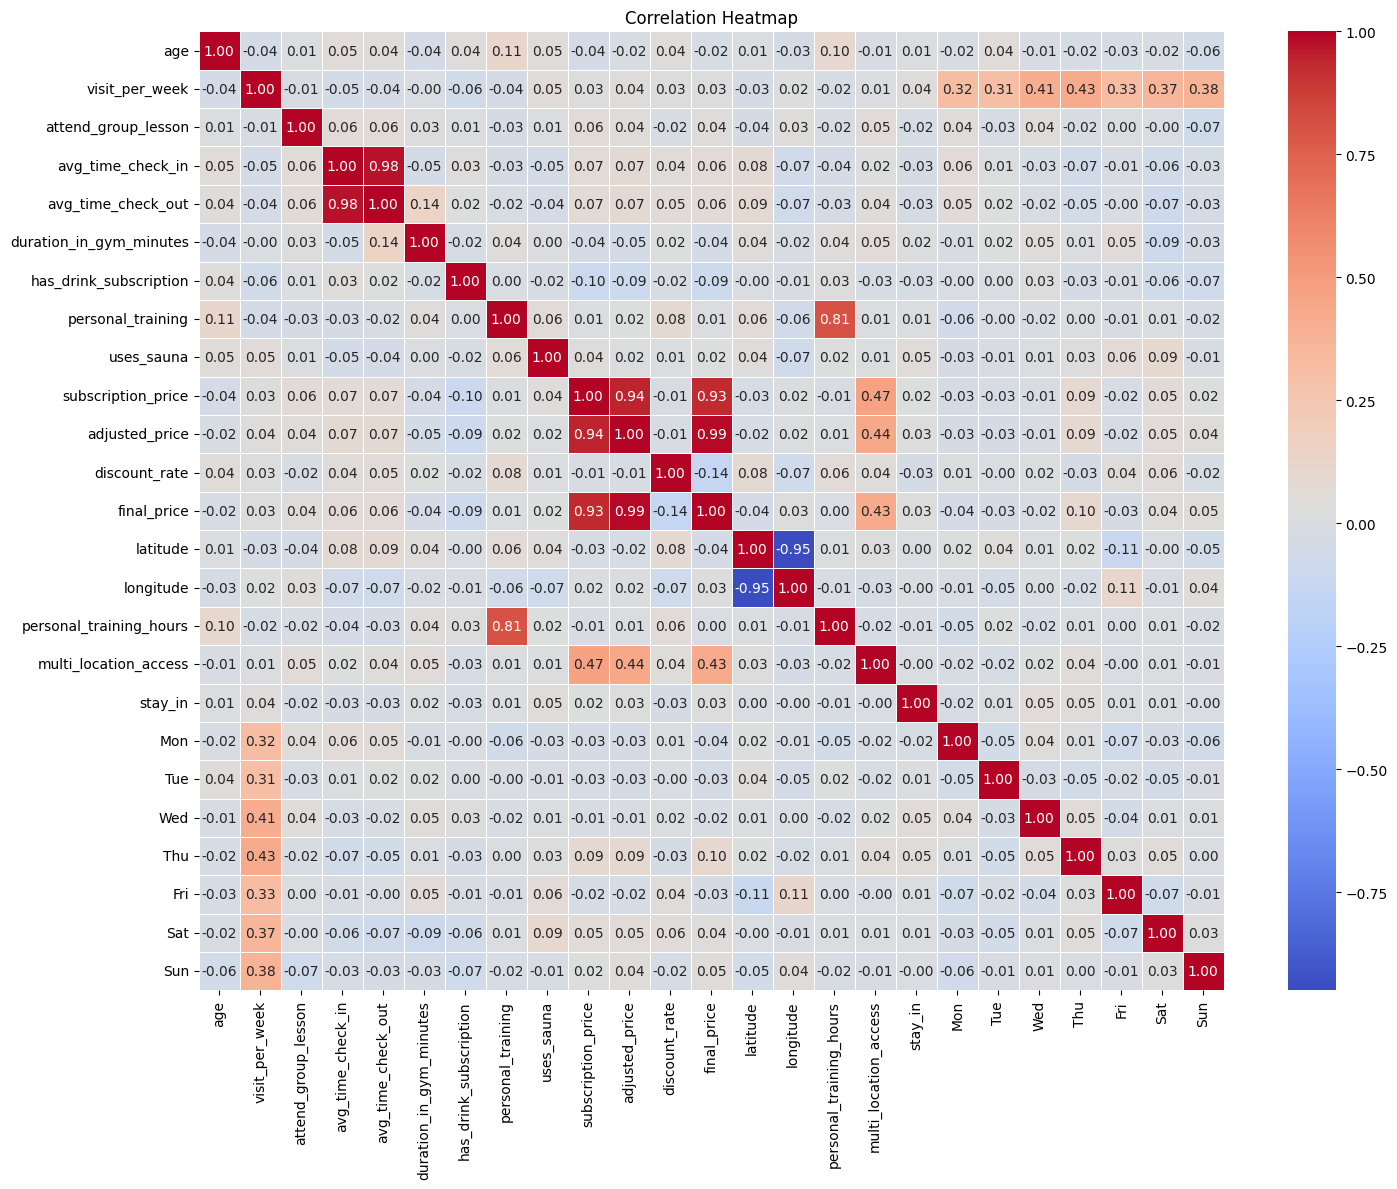

In [18]:
cor = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [19]:
df

,age,membership_type,visit_per_week,attend_group_lesson,avg_time_check_in,avg_time_check_out,duration_in_gym_minutes,has_drink_subscription,personal_training,uses_sauna,...,multi_location_access,last_visit_date,stay_in,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,40,Premium,2,False,8,10,118,False,False,False,...,True,2025-06-30,406,0,0,0,1,0,1,0
1,35,Standard,5,True,15,18,178,False,False,False,...,False,2025-05-26,985,0,1,1,1,1,1,0
2,39,Standard,4,True,13,14,62,True,True,True,...,False,2025-06-09,766,0,1,1,1,0,0,1
3,35,Basic,2,False,17,18,93,True,True,False,...,False,2025-06-17,632,1,1,0,0,0,0,0
4,18,Standard,2,False,14,16,161,True,True,False,...,True,2025-07-13,187,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,12,Premium,2,True,10,12,90,False,False,False,...,True,2025-06-13,690,0,0,0,1,0,0,1
1994,16,Standard,2,False,11,12,69,False,False,True,...,False,2025-05-26,991,0,0,0,1,1,0,0
1995,24,Elite,4,False,15,16,66,False,True,False,...,True,2025-07-18,99,0,1,0,0,1,1,1
1996,20,Basic,3,True,8,11,138,False,True,True,...,False,2025-07-19,87,1,1,0,0,0,1,0


In [20]:
df['discount_rate'].replace(0.01,0.1, inplace=True)

C:\Users\computer\AppData\Local\Temp\ipykernel_10900\475495507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount_rate'].replace(0.01,0.1, inplace=True)


In [21]:
df.describe()

,age,visit_per_week,avg_time_check_in,avg_time_check_out,duration_in_gym_minutes,subscription_price,adjusted_price,discount_rate,final_price,latitude,...,personal_training_hours,last_visit_date,stay_in,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,30.591091,2.676176,14.003003,15.746246,104.818819,40.140140,36.596847,0.057858,34.471384,35.818504,...,2.305806,2025-06-22 13:54:35.675675904,531.007007,0.354354,0.388889,0.403904,0.371872,0.384885,0.370871,0.401401
min,12.000000,1.000000,8.000000,8.000000,30.000000,20.000000,15.000000,0.000000,12.750000,32.715698,...,0.000000,2025-05-24 00:00:00,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,11.000000,13.000000,67.000000,30.000000,22.500000,0.000000,22.500000,33.836601,...,0.000000,2025-06-07 00:00:00,269.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,3.000000,14.000000,16.000000,103.000000,50.000000,37.500000,0.050000,31.875000,36.737801,...,1.000000,2025-06-22 00:00:00,539.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,3.000000,17.000000,19.000000,142.000000,50.000000,50.000000,0.100000,45.000000,37.774899,...,5.000000,2025-07-08 00:00:00,784.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,49.000000,5.000000,20.000000,23.000000,180.000000,70.000000,70.000000,0.150000,70.000000,38.581600,...,8.000000,2025-07-22 00:00:00,1035.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,10.740041,1.234110,3.734556,3.767421,43.363542,15.457645,14.860914,0.058296,14.266186,1.994180,...,2.758167,NaN,293.794124,0.478437,0.487620,0.490801,0.483425,0.486690,0.483159,0.490305


In [22]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_fitness_data.csv", index=False)